<a href="https://colab.research.google.com/github/r1one-22/Linear_Regression/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#untuk membaca dan menampilkan dataset
df = pd.read_csv("/content/seattle-weather.csv")
df


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
#Untuk menampilkan 25 baris pertma dara dataSet dan menyimpannya menjadi variabel baru
df10 = df.head(25)
df10.to_csv("seattle_weather_1.csv", index=False) #Menyimpan data csv tan menyertatakn kolom indeksnya

In [ ]:
df10

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [ ]:
from sklearn.preprocessing import LabelEncoder


#untuk mendecode/megubah data kategori menjadi numerik agar bisa dibaca oelh machine learning sepreti decision tree

#memmbuat dictionary kosong untuk menympan encoder tiaap kolom
label_encoders = {}

#Melakukan encoding untuk setiap kolong kecuali "weather"
for column in df10.columns:
    if column != 'weather':
        le = LabelEncoder()
        df10[column] = le.fit_transform(df10[column])
        label_encoders[column] = le

#Melakukan encoding khusus untuk "weather" dan menyimpannya di kolom baru bernama "weather_encoded"
le_target = LabelEncoder()
df10['weather_encoded'] = le_target.fit_transform(df10['weather'])

#Menampilkan dataSet
display(df10)

/tmp/ipython-input-1556252579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10[column] = le.fit_transform(df10[column])
/tmp/ipython-input-1556252579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10[column] = le.fit_transform(df10[column])
/tmp/ipython-input-1556252579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0,0,17,11,10,drizzle,0
1,1,12,14,8,9,rain,1
2,2,1,15,13,5,rain,1
3,3,16,16,12,10,rain,1
4,4,3,11,8,17,rain,1
5,5,4,5,7,4,rain,1
6,6,0,9,8,5,rain,1
7,7,0,13,8,3,sun,3
8,8,7,12,11,7,rain,1
9,9,2,7,5,7,rain,1


In [ ]:
#Untuk menampilkan info dataSet
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             25 non-null     int64 
 1   precipitation    25 non-null     int64 
 2   temp_max         25 non-null     int64 
 3   temp_min         25 non-null     int64 
 4   wind             25 non-null     int64 
 5   weather          25 non-null     object
 6   weather_encoded  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df10[['date','precipitation','temp_max', 'temp_min', 'wind']] #data yang digunaka untuk memprediksi
y = df10['weather_encoded'] #label yang digunakan untuk memprediksi

#Untuk membuat model DecisionTree
dt_classifier = DecisionTreeClassifier()
#Untuk melatih model data yang sudah dipisahkan
dt_classifier.fit(X, y)

DecisionTreeClassifier()

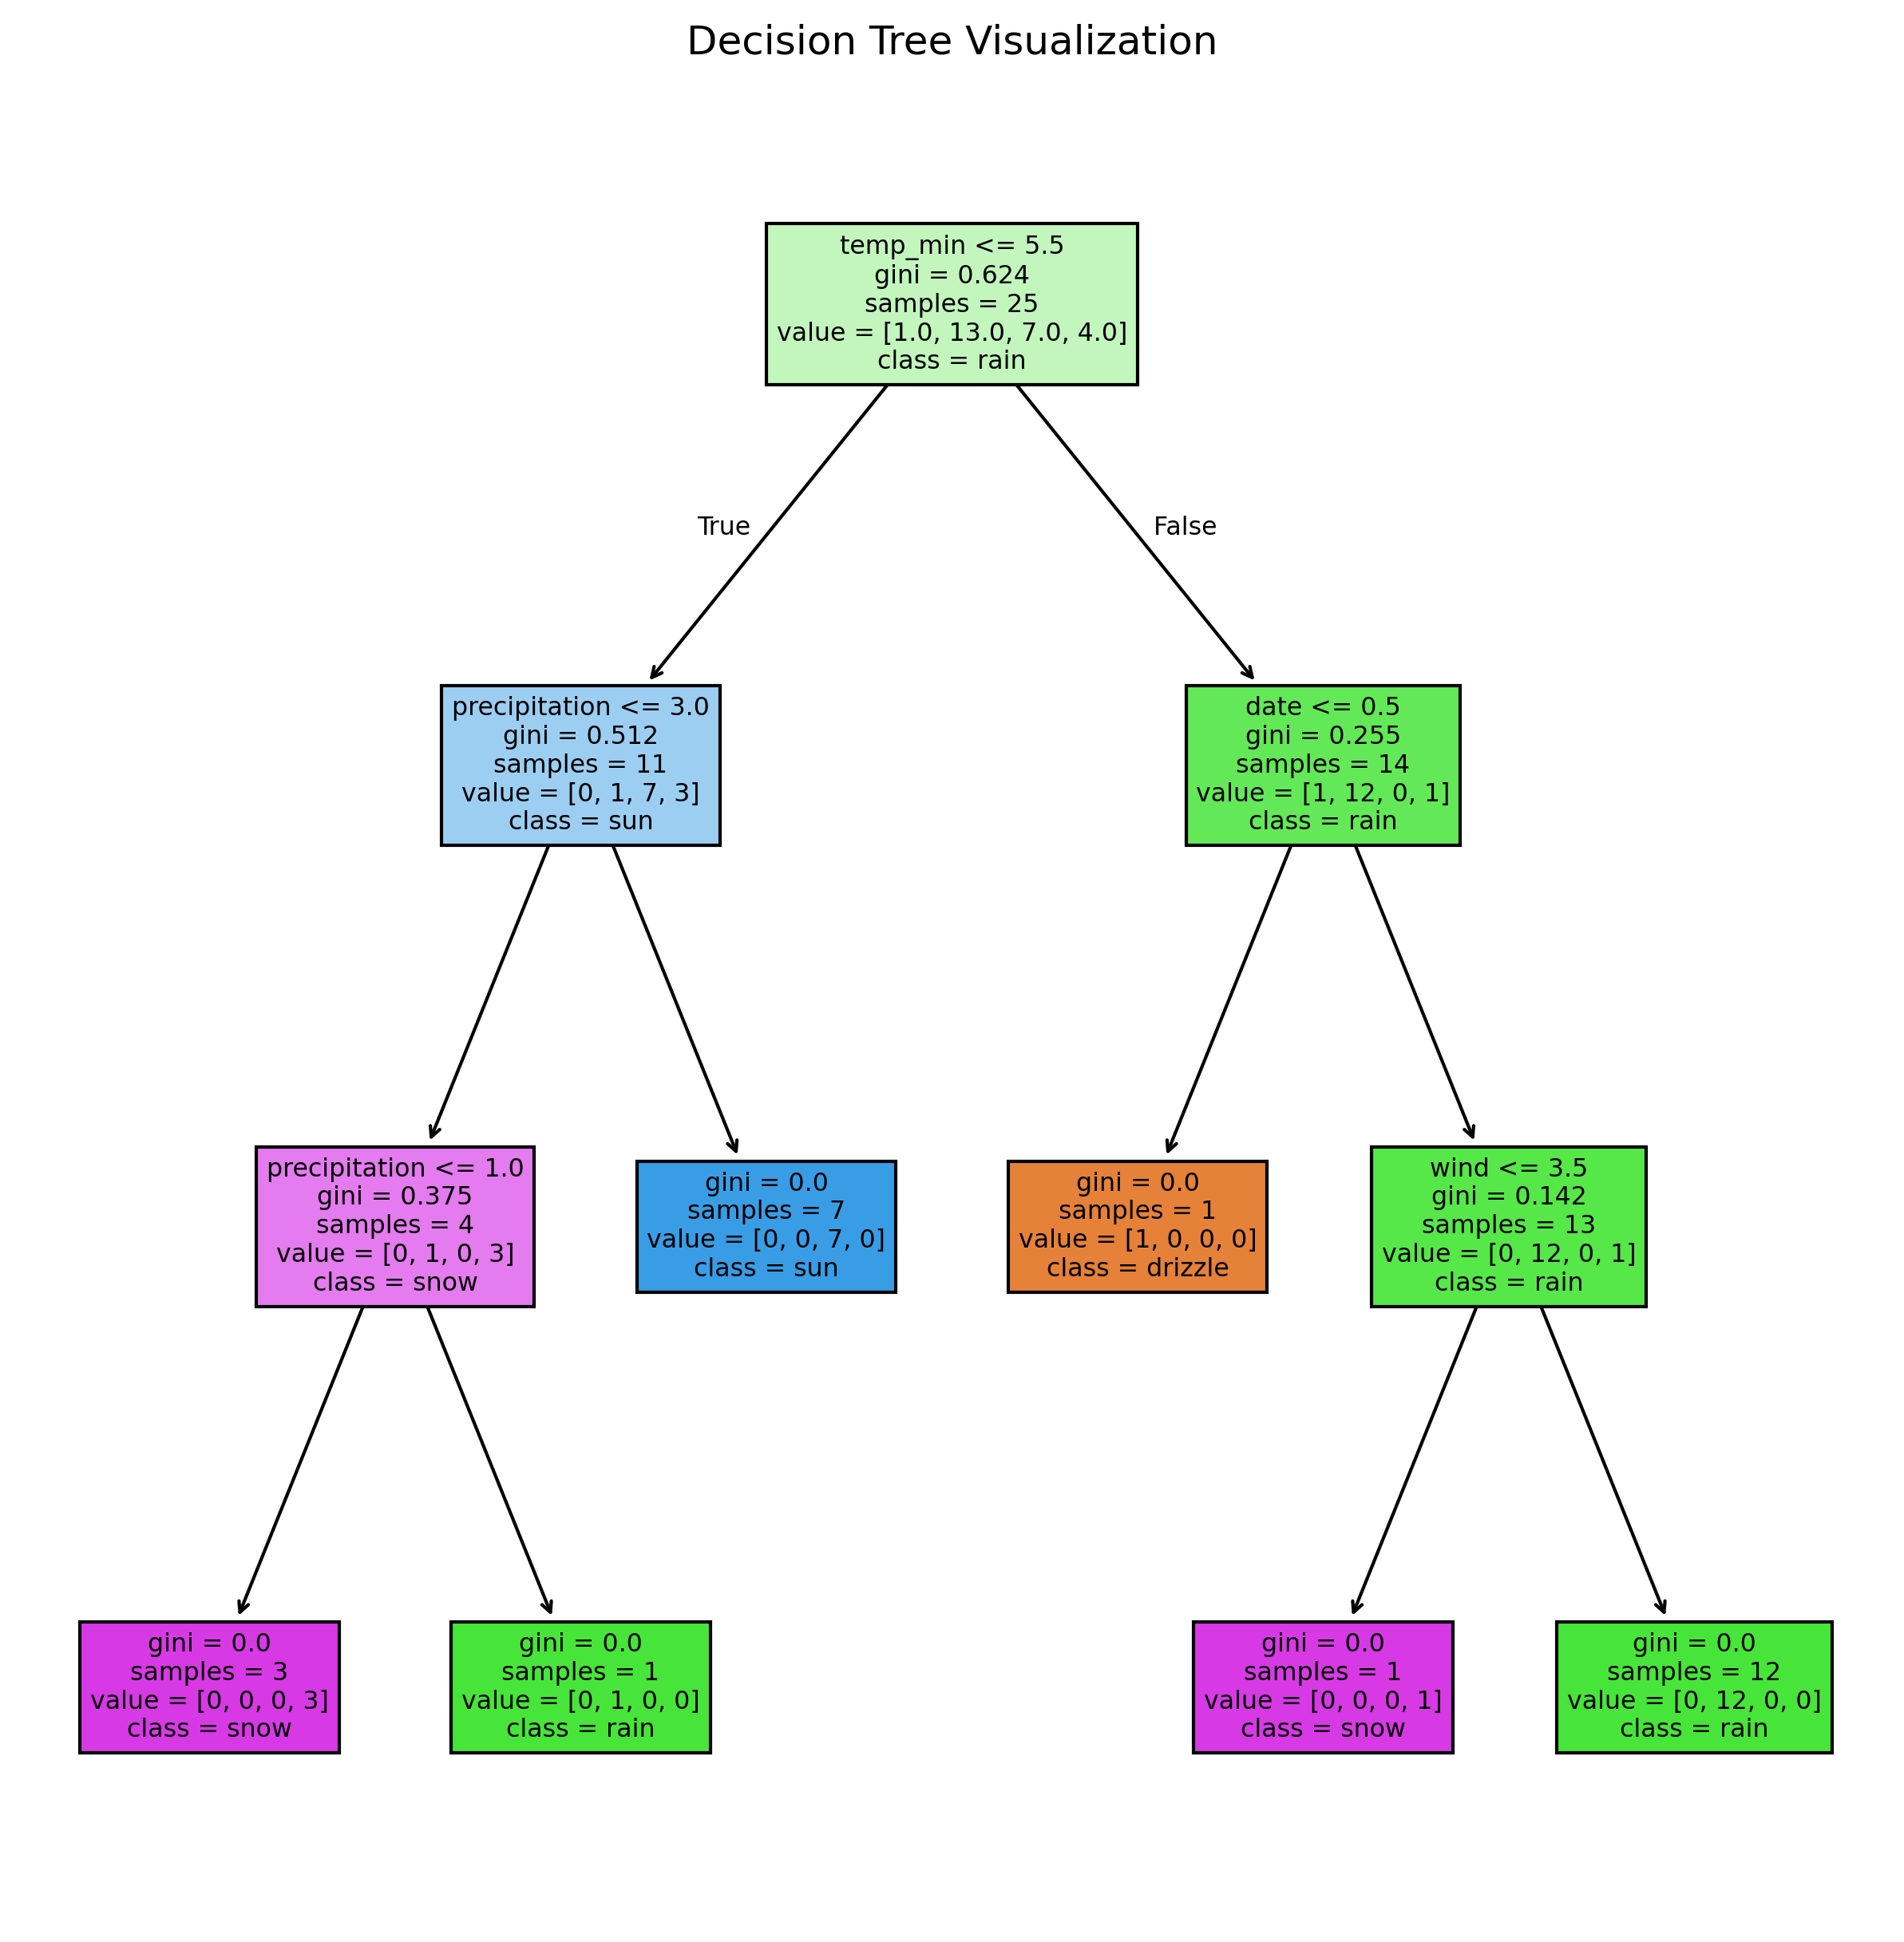

In [ ]:
# Untuk menampilkan visualisasi bentuk pohon keputusan dari data yg sudah dilatih sebelumnya

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300) #untuk membuat satu gamabar plot dengan ukuran 10x10 ich serta relosui tinggi
plot_tree(dt_classifier,
          feature_names = X.columns, #Menampilkan nama fitur di setiap node
          class_names = df10['weather'].unique(), #Menampilkan label kelas cuaca (Sunny, Rain, dll)
          filled = True) #Memberi warna pada node berdasarkan kelas dominan

#Memberikan judul pada garif dan menampilkannya
plt.title('Decision Tree Visualization')
plt.show()